In [1]:
import cv2
import os
import numpy as np
from glob import glob

In [24]:
IMAGES_DIR = '../../../Resources/dataset/'
img_size = 100

In [25]:
pav_bhaji = []

pav_bhaji_images = glob(os.path.join(IMAGES_DIR, '1/*.jpg'))
len(pav_bhaji_images)

183

In [26]:
for img in pav_bhaji_images:
    img = cv2.imread(img)
    img = cv2.resize(img, (img_size, img_size))
    pav_bhaji.append(img)
    
len(pav_bhaji)

183

In [27]:
not_pav_bhaji = []
not_pav_bhaji_images = glob(os.path.join(IMAGES_DIR, '0/*.jpg'))
len(not_pav_bhaji_images)

269

In [28]:
for img in not_pav_bhaji_images:
    img = cv2.imread(img)
    img = cv2.resize(img, (img_size, img_size))
    not_pav_bhaji.append(img)
    
len(not_pav_bhaji)

269

In [29]:
true_labels = [1] * len(pav_bhaji)
false_labels = [0] * len(not_pav_bhaji)

In [30]:
X = pav_bhaji + not_pav_bhaji
y = true_labels + false_labels

len(X), len(y)

(452, 452)

In [31]:
data = list(zip(X, y))

In [32]:
import random

In [33]:
random.shuffle(data)

In [34]:
X, y = zip(*data)

In [35]:
X = np.array(X)
X.shape

(452, 100, 100, 3)

In [36]:
y = np.array(y)
y.shape

(452,)

In [37]:
len(X) == len(y)

True

In [38]:
import matplotlib.pyplot as plt

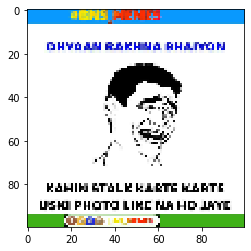

In [39]:
plt.imshow(X[219])

In [40]:
y[219]

0

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [43]:
import tensorflow as tf

In [73]:
## Neural net
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2, 2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2, 2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2, 2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2, 2))
model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
# model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(2, 2))
# model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 44, 44, 128)      

In [74]:
# ## Neural net
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model.add(tf.keras.layers.MaxPool2D(2, 2))

# model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(2, 2))

# model.add(tf.keras.layers.Dropout(0.2))

# model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# model.summary()

In [75]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
model.fit(X_train, y_train, batch_size=12, epochs=30, validation_data=(X_test, y_test))

Train on 316 samples, validate on 136 samples
Epoch 1/30
316/316 [==============================] - 10s 31ms/sample - loss: 0.7372 - accuracy: 0.5949 - val_loss: 10.2513 - val_accuracy: 0.6029
Epoch 2/30
316/316 [==============================] - 6s 17ms/sample - loss: 0.6478 - accuracy: 0.6709 - val_loss: 18.9706 - val_accuracy: 0.6029
Epoch 3/30
316/316 [==============================] - 6s 19ms/sample - loss: 0.7039 - accuracy: 0.6741 - val_loss: 2.6217 - val_accuracy: 0.6029
Epoch 4/30
316/316 [==============================] - 5s 17ms/sample - loss: 0.6492 - accuracy: 0.6392 - val_loss: 0.7107 - val_accuracy: 0.6176
Epoch 5/30
316/316 [==============================] - 6s 18ms/sample - loss: 0.5951 - accuracy: 0.6741 - val_loss: 0.6464 - val_accuracy: 0.6544
Epoch 6/30
316/316 [==============================] - 6s 18ms/sample - loss: 0.5371 - accuracy: 0.7500 - val_loss: 0.8779 - val_accuracy: 0.6397
Epoch 7/30
316/316 [==============================] - 6s 18ms/sample - loss: 0.53

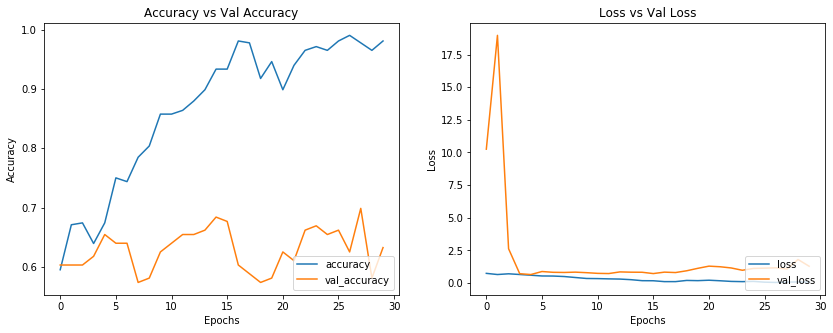

In [77]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Val Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Val Loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')